In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os
import numpy as np
import cv2


class Data:

  def __init__(self,zip_dir,out_dir):
    super().__init__()
    self.path_folder = out_dir
    self.sub_folder = None
    self.All_img = None
    self.unzip(zip_dir)
    direct = zip_dir.split('/')
    # print(direct)
    self.zip_name = direct[-1].split('.')[0]
    # print(zip_name)
    self.load()

  def unzip(self,Path):
   zip_file_path = f'{Path}'
   with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(self.path_folder)


  def load(self):
    path = f'{self.path_folder}{self.zip_name}/images'
    self.data = []
    a = os.listdir(path)
    for i in a:
      b = os.listdir(f'{path}/' + i)
      for j in b:
        self.data.append(f'{path}/' + i + '/' + j)


  def read(self,n):
    images = []
    for i in range(n):
     img = cv2.imread(self.data[i])
     img = self.preprocess(img)
     images.append(img)
    images = np.array(images)
    return images

  def preprocess(self,image):
    #normalize
    pixels = image.astype('float32')
    pixels /= 255.0
    #resize
    img_normalized = cv2.resize(pixels,(1024,1024))

    return img_normalized


In [ ]:
#Unzip , load , read folders

path_train = '/content/drive/MyDrive/WIDER dataset/WIDER_train.zip'
path_val = '/content/drive/MyDrive/WIDER dataset/WIDER_val.zip'
path_test = '/content/drive/MyDrive/WIDER dataset/WIDER_test.zip'
output = '/content/'

train_dataset = Data(path_train,output)
val_dataset = Data(path_val,output)
test_dataset = Data(path_test,output)

# train = train_dataset.read(10)
# val = val_dataset.read(1)
# test = test_dataset.read(1)

In [ ]:
# Remove all folder
!rm -R WIDER_train/
!rm -R WIDER_test/
!rm -R WIDER_val/

## Try 2

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.9 MB/s eta 0:00:00


In [ ]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# specify folder to plot
folder = train_dataset
i = 1
# enumerate files
for filename in os.listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
	# plot
	plt.subplot(2, 7, i)
	plt.axis('off')
	plt.imshow(face)
	i += 1
plt.show()

3/3 [==============================] - 0s 34ms/step


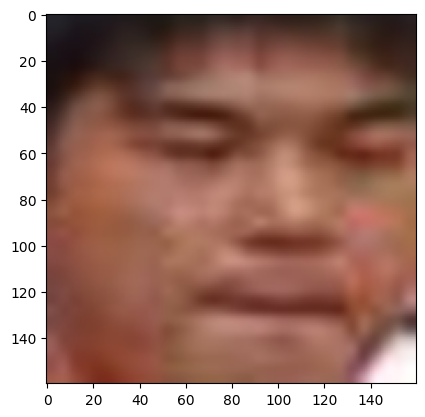

(160, 160, 3)


In [ ]:
# load the photo and extract the face
pixels = extract_face('/content/WIDER_val/images/0--Parade/0_Parade_Parade_0_12.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)